In [38]:
from pathlib import Path

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import numpy as np
import xarray as xr
import mygrad as mg

다음으로, 선형 회귀에 사용할 데이터를 가져오는 코드를 작성하고, y축에 윙스팬, x축에 신발을 신지 않았을 때의 키를 둔 산점도를 나타내어보자. 실습 2에서 해본 내용이니, 기억이 잘 나지 않는다면 실습 2를 복습하고 다시 한번 해보자.

In [11]:
# xarray-dataset인 NetCDF-4 파일 `./data/nba_draft_measurements.nc`을 불러오기
# 여기에 코드 작성
draft_data = xr.load_dataset(Path.cwd() / "nba_draft_measurements.nc")
draft_data

<xarray.Dataset>
Dimensions:            (names: 70)
Coordinates:
  * names              (names) object 'Nickeil Alexander-Walker' ... 'Dylan W...
Data variables:
    position           (names) object 'SG' 'C' 'PF' 'C' ... 'PG' 'SF' 'PF' 'SF'
    height_no_shoes    (names) float64 76.25 80.75 79.75 ... 78.25 77.75 78.25
    height_with_shoes  (names) float64 77.5 82.0 81.0 86.5 ... 79.75 79.5 79.5
    weight             (names) float64 203.8 239.0 208.4 ... 208.8 240.2 195.8
    wingspan           (names) float64 81.5 87.5 84.0 91.0 ... 82.75 81.75 82.0
    standing_reach     (names) float64 102.0 109.5 107.0 ... 103.0 104.5 104.5
    body_fat_prcnt     (names) float64 5.9 8.5 3.6 7.1 5.0 ... 4.3 4.9 5.4 4.6
    hand_length        (names) float64 8.5 9.25 9.0 9.25 ... 7.75 8.5 9.0 8.25
    hand_width         (names) float64 8.75 9.5 9.75 9.5 ... 9.0 9.5 10.5 9.5
Attributes:
    length-units:  inches
    weight-units:  pounds
    readme:        \nDescribes various measurements of athletes who participa...
    url:           https://www.nbadraft.net/2019-nba-draft-combine-measurements/

In [16]:
# y축에 윙스팬, x축에 신발을 신지 않았을 때의 키를 둔 산점도를 그리기
# 여기에 코드 작성

# ----
fig, ax = plt.subplots()
x = draft_data.height_no_shoes
y = draft_data.wingspan
ax.scatter(x, y)
ax.set_title("Wingspan vs Height for NBA Draftees from 2019")
ax.grid()

<IPython.core.display.Javascript object>

## Step 2. 선형 회귀 다시 짚어보기  
  
  관측된 데이터가 $( x_n, y_n^{(true)})^{N-1}_{n=0}$와 같은 형태로 총 $N$개라고 하자($ x_i $: 인덱스가 $i$인($i+1$번째) 농구선수의 키, $y_i$: 인덱스가 $i$인($i+1$번째)번째 농구선수의 윙스팬). 선형 회귀 모델은 $F(m, b;x) = mx + b$이라고 하자. 이 경우, $x_i$에 대한 예측값 $y_i^{(pred)}$은 $y_i^{(pred)}=F(m, b;x_i ) = m x_i + b$으로 표현해볼 수 있을 것이다. 손실함수를 잔차 제곱의 평균을 의미하는 ‘평균 제곱 오차’로 둘 때, 이 함수 $ℒ_{MSE}$를 $y_n^{(true)}$와 $y_n^{(pred)}$에 대해 표현해보자.
  이제, 앞선 실습(교재 2절의 예제 2-4)에서 작성했던 함수 ordinary_least_squares를 다시 작성해보자. 이후, Step 1에서 불러온 데이터와 이 함수를 활용하여 $m$, $b$의 이상적인 값 $m^*$, $b^*$을 계산해보자. 이 값은 이후 경사하강법을 이용하여 구한 값을 평가하는 지표로 활용할 것이다. 단, 실제 지도학습 상황에서는 이처럼 정확한 값을 구하는 것은 불가능한 경우가 많음을 기억하자.

In [13]:
def ordinary_least_squares(x, y):
    """
    앞선 실습과 동일
    """
    # 여기에 코드 작성
    N = len(x)
    # 1주차의 최소제곱추정량 사용 
    m = (np.sum(np.dot(x, y)) - (np.sum(x)*np.sum(y)/N)) / ((np.sum(x**2)) - ((np.sum(x))**2/N))
    b = np.mean(y) - m * np.mean(x)
    return m, b

In [14]:
# 윙스팬 vs 신발을 신지 않은 키 데이터의 선형 회귀 모델에서의 m* and b* 값 계산

# 해당 데이터의 numpy array에 접근하기
# 여기에 코드 작성
height = draft_data.height_no_shoes.data
wingspan = draft_data.wingspan.data

# 이상적인 값인 m*, b* 계산하기
# 여기에 코드 작성
m, b = ordinary_least_squares(height, wingspan)
print(m, b)

1.0269361143266387 2.8045506927401505


코드를 살펴보면서 함수의 기능과 구현 방식을 이해했다면, 위의 함수를 활용하여 우리의 데이터에 대한 $ℒ_{MSE}(m,b)$ 그래프를 그려보자. 실행 결과와 코드를 함께 살펴보면 코드를 더 잘 이해할 수 있을 것이다. 이때, trajectory에는 Step 2에서 계산한 $[m^*, b^*]$를 대입하여, 우리가 구한 $[m^*, b^*]$값(출력된 결과 그래프에서 별표 표시)과 graph_linear_regression_mse()에서 계산한 m_opt, b_opt 값이 동일한지, 즉 이 두 점에서 MSE 값이 가장 작게 나타나는지 확인해보자. 검은색 점과 별 모양 점이 겹쳐져서 나타났다면, 우리가 Step 2를 잘 수행한 것이다.

<IPython.core.display.Javascript object>


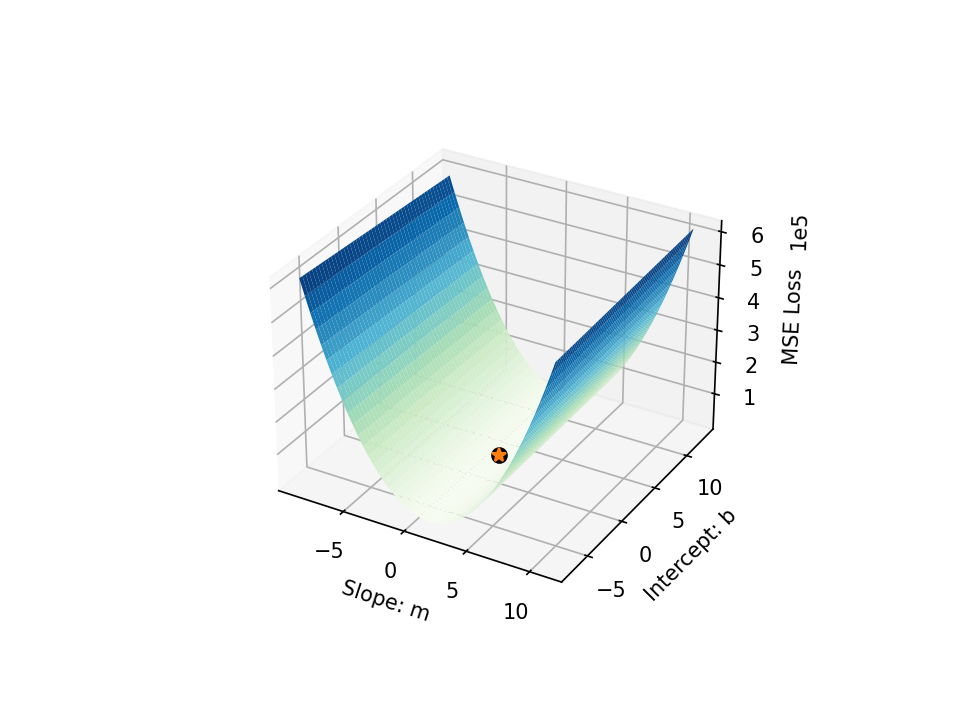

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:xlabel='Slope: m', ylabel='Intercept: b'>)

In [7]:
# Step 2에서 계산한 [m*, b*]를 포함하여, 선형 회귀 모델에 대한 MSE 그래프 그리기
graph_linear_regression_mse(height, wingspan, trajectory=[m, b])

  그려진 loss landscape에 겹쳐져 나타난 점은 우리가 찾고자 하는 ‘가장 좋은 모델’의 모델 파라미터값들을 담은 점으로, 이후의 Step 4부터는 이 점을 찾기 위해 그래프를 따라 내려오는 경사하강법을 코드로 구현해볼 것이다. 그 전에, 주어진 데이터에 대한 그래프의 개형이 멕시코 음식인 ‘타코’의 타코쉘 모양을 닮았다는 점에 주목해보자. 
  MSE 값인 손실함수의 식 형태를 생각해보면, 앞선 실습(책의 3.4.)에서 다루었었던 $ℒ(w_1, w_2) = 2 w_1^2 + 3 w_2^2$와 유사한 이차식 형태가 나올 것이라고 짐작 가능하다. 그런데 실습의 실행 결과와 앞(교재 3.4.)에서 보았던 그래프의 개형은 많이 다름을 확인해볼 수 있을 것이다. 이러한 차이는 본 실습에서 그려진 그래프에서, 값을 조금 변화시킬 때 나타나는 MSE 값의 변화에 비해, 값을 조금 변화시킬 때 나타나는 MSE 값의 변화가 훨씬 작게 나타나기 때문에 나타난다. 이 변화율의 차이는, 변화율을 이용하여 ‘하강’을 진행하는 경사하강법의 결과에 어떤 영향을 줄까? 이에 대해서는 이 실습의 끝자락에서 다시 논의해보자.

## Step 4. 선형 회귀 모델을 경사하강법으로 학습시키기 위한 기초 함수 만들기  
  
경사하강법으로 모델을 학습시키기 위해 필요한 두 개의 함수를 우선 작성하자. 경사하강법을 구현하는 함수 gradient_step과 손실함수로 사용할 모델이 예측한 값과 실제로 관측된 값 사이의 MSE 값을 계산하는 함수 mean_squared_error_mygrad를 작성해보자. gradient_step 함수의 경우, 실습 3에서 구현해보았던 함수와 동일하다.

In [33]:
def gradient_step(tensors, learning_rate):
    """
    실습 3의 동일한 함수 참고
    """
    # 여기에 코드 작성
    if isinstance(tensors, mg.Tensor):
        
        tensors = [tensors]
    
    # for 문을 이용하여 tensors의 tensor를 하나씩 꺼내며 경사하강을 진행
    # 여기에 코드 작성
    
    for i in range(len(tensors)):
        tensors[i].data -= learning_rate * tensors[i].grad

In [17]:
import mygrad as mg

def mean_squared_error_mygrad(y_pred, y_true):
    """ 
    모델이 예측한 값과 실제 값 사이의 MSE 값을 계산하는 함수

    매개변수 (Parameters)
    ----------
    y_pred : mygrad.Tensor, N개의 원소로 구성(shape-(N,))
        N개의 예측값으로 구성된 텐서

    y_true : array_like, N개의 원소로 구성(shape-(N,))
        N개의 실제 값으로 구성딘 배열

    반환 값 (Returns)
    -------
    mse : mygrad.Tensor, 단일 원소(shape-())
        MES 값을 원소로 갖는인 스칼라 텐서

    실행 예시
    --------
    >>> pred = mg.Tensor([1., 2., 3.])
    >>> true = mg.Tensor([1., 1., 3.])
    >>> mean_squared_error_mygrad(pred, true)
    Tensor(0.33333333)
    """
    # 여기에 코드 작성
    return np.mean(np.sum((y_pred - y_true) ** 2)/len(y_pred))   

In [18]:
pred = mg.Tensor([1., 2., 3.])
true = mg.Tensor([1., 1., 3.])
mean_squared_error_mygrad(pred, true)

Tensor(0.33333333)

In [31]:
true_params = np.array(ordinary_least_squares(height, wingspan))

def dist_from_true(model_params, true_params) -> float:
    """ 
    sqrt[(m - m*)^2 + (b – b*)^2] 값을 계산하여 반환하는 함수
    
    매개변수 (Parameters)
    ----------
    model_params : Tuple[Tensor, Tensor]
        텐서인 m, b를 저장하는 튜플
    
    true_params : numpy.ndarray, shape-(2,)
        m*, b* 값을 저장하는 numpy 배열
    
    반환 값 (Returns)
    -------
    float형
        sqrt[(m - m*)^2 + (b – b*)^2] 값
    """
    params = np.array([i.item() for i in model_params])
    return np.sqrt(np.sum((true_params - params) ** 2))

In [23]:
from mygrad.nnet.initializers import uniform # 모델 파라미터의 초기화(균등분포로부터 랜덤 추출)를 위한 uniform 함수를 import

class LinearModel:
    """
    객체 변수 `self.m`과 `self.b`를 갖는 선형 모델 클래스
    """

    def initialize_params(self):
        """
        `mygrad.nnet.initializers.uniform` 함수를 사용하여 self.m과 self.b에 텐서 값(둘 다 shape-(1,) 텐서)을 초기화
        균등분포 [-10, 10]에서의 값으로 초기화가 진행되도록
        uniform(1, lower_bound=-10, upper_bound=10)을 사용하면 균등분포로부터 shape-(1,) tensor가 추출됨
        """
        self.m = uniform(1, lower_bound=-10, upper_bound=10)
        self.b = uniform(1, lower_bound=-10, upper_bound=10)

    def __init__(self, m=None, b=None):
        """ 
        m, b의 초깃값을 직접 입력받아 초기화하는 역할.
        입력되지 않는 경우 메서드 `self.initialize_params()`를 활용하여 m, b의 값을 랜덤하게 초기화

        매개변수 (Parameters)
        ----------
        m : 입력 여부 선택, 입력 시 mygrad.Tensor, shape-(1,)
            선형 모델의 기울기. ‘None’이라면 랜덤한 값을 배정

        b : 입력 여부 선택, 입력 시 mygrad.Tensor, shape-(1,)
            선형 모델의 y절편. ‘None’이라면 랜덤한 값을 배정
        """
        self.initialize_params()

        if m is not None:
            self.m = m

        if b is not None:
            self.b = b

    def __call__(self, x):
        """
        x를 입력받아 m * x + b의 계산을 수행, 즉 선형 모델을 이용하여 y의 예측값 계산

        매개변수 (Parameters)
        ----------
        x : N개의 원소로 구성된 배열 혹은 텐서(array_like, shape-(N,))

        반환 값 (Returns)
        -------
        prediction : mygrad.Tensor, shape-(N,)
            선형 모델에 의해 계산된, N개의 예측값을 저장하는 텐서
        """
        return self.m * x + self.b

    @property
    def parameters(self):
        """ 
        모델 파라미터를 저장하는 두 텐서(기울기, y절편)을 튜플의 형태로 반환
        데코레이터 @property를 붙였기에 메서드가 아닌 속성처럼 사용해야 함.
        즉, model.parameters()가 아닌 model.parameters로 호출

        반환 값 (Returns)
        -------
        Tuple[Tensor, Tensor]
            모델의 학습 가능한 모델 파라미터(기울기, y절편)들을 모아놓은 튜플

        실행 예시
        --------
        >>> model = LinearModel()
        >>> model.parameters
        (Tensor([-7.714269], dtype=float32), Tensor([-6.770146], dtype=float32))
        """
        return (self.m, self.b)

In [11]:
# 클래스가 의도한 대로 잘 설계되었는지 확인하기

model = LinearModel()

assert isinstance(model.m, mg.Tensor) and model.m.size == 1
assert isinstance(model.b, mg.Tensor) and model.b.size == 1
assert model.parameters == (model.m, model.b)

output = model(1)
assert isinstance(output, mg.Tensor) and output.size == 1

In [21]:
from noggin import create_plot  # create_plot 함수를 import
plotter, fig, ax = create_plot(["loss", "m", "b", "dist_from_target"], ncols=2)

<IPython.core.display.Javascript object>

이제, 경사하강법으로 선형 회귀 모델을 학습시키는 코드를 완성해보자. 주석을 참고하여 코드를 작성하고 성공적으로 실행시키면, 위 코드에서 그려졌던 네 개의 좌표평면에 그래프가 채워질 것이다. 본래는 실시간으로 그려지겠지만, 본 실습에서는 스텝을 10번만 반복하여 컴퓨터의 계산이 너무 빨리 이루어지기에, 육안으로 그래프가 채워지는 과정을 볼 수는 없다.

In [ ]:
for n in range(num_epochs):
    # 전체 데이터셋에 대해 ‘순전파(용어는 다음 절에서 설명)’를 진행
    # 주어진 모든 키 데이터에 대한 윙스팬 예측값을 변수 y_pred에 저장
    # 여기에 코드 작성
    
    # Step 4에서 작성한 mean_squared_error_mygrad를 활용하여, 실제 윙스팬 값과 예측한 윙스팬 값 사이의 MSE로 정의되는 손실함수 값을 계산하여 변수 loss에 할당
    # 여기에 코드 작성
    
    # 실습 3에서 다루었던 mygrad 라이브러리의 자동미분 기능을 활용하여, 우리의 모델 파라미터 값에서의 손실함수의 편도함수 계산
    # 계산된 손실함수를 활용하여 ‘역전파(용어는 다음 절에서 설명)’를 진행
    # 여기에 코드 작성

    # noggin 라이브러리를 활용하여 네 개의 그래프 실시간으로 채우기
    # 이 부분은 그대로 실행
    plotter.set_train_batch(
        dict(
            loss=loss,
            m=model.m.item(),
            b=model.b.item(),
            dist_from_target=dist_from_true(model.parameters, true_params),
        ),
        batch_size=len(y_pred),
    )
    
    # append 함수를 사용하여, 현재의 모델 파라미터 값을 trajectory 배열에 추가
    # 여기에 코드 작성
    trajectory.append((model.m.item(), model.b.item()))
    
    # Step 4에서 작성한 gradient_step 함수를 활용하여, 경사하강법의 한 스텝을 진행하여 모델 파라미터를 갱신
    # 여기에 코드 작성
    gradient_step(model.parameters , learning_rate)

# noggin에서 아직 그래프에 표시하지 못한 수치(lingering measurements)를 표시
plotter.plot()

In [17]:
# 최종적인 dist_from_taret 함수의 값을 출력
train_metrics = plotter.to_xarray("train").batch
train_metrics.dist_from_target[-1]

<xarray.DataArray 'dist_from_target' ()>
array(8.24442079)
Coordinates:
    iterations  int32 10

실행 결과를 보면, 초깃값에 따라 학습된 모델의 결과가 크게 달라짐을 확인해볼 수 있을 것이다. 여러 차례 살펴보았듯, 현재 우리가 구현한 경사하강법을 통해서는 이상적인 모델과 가까운 모델을 얻기가 쉽지 않다. 그 이유가 무엇일지 생각해보자. 이유와 해결책은 바로 다음 과정인, Step 7에서 다룬다.

## Step 7. 데이터 전처리: 데이터를 표준화하기

Step 6의 마지막 과정에서 그린 loss landscape를 찬찬히 살펴보면, Step 6에서 우리가 바라던 학습이 이루어지지 않았던 이유는 loss landscape가 $b$보다 $m$에 대해 더 민감하게 변화하기 때문이다. 이는 사용한 데이터의 중심이 원점($x$(키)=0, $y$(윙스팬)=0)으로부터 멀리 떨어져 있기 때문이다. 데이터셋의 산점도에 선형 회귀 모델을 함께 그린 그래프(책의 그림을 확인하자!)와 연관지어서 이 점을 생각해보자.

y-절편이 동일하고, 기울기가 다른 두 일차함수의 함숫값의 차이는 원점 근방의 점에서보다 원점으로부터 멀리 떨어진 점에서 더 크게 나타날 것이다. 반면, 기울기가 동일하고, y-절편이 다른 두 일차함수의 함숫값 차이는 원점으로부터의 거리와 상관없이 일정하게 나타날 것이다. 우리가 사용한 데이터의 중심(평균값)은 실제로 키 80인치, 윙스팬 85인치로, 원점과는 상당한 거리가 있다. 따라서, 선형 회귀 모델의 기울기인 $m$값에 약간의 차이만 생겨도 예측값에 큰 차이가 생기며 손실함수 값 또한 차이가 크게 생기는 것이다. $b$ 값의 차이는 이에 비해 예측값에 주는 영향이 적기에, 손실함수에 주는 영향이 보다 작았던 것이다. 이는 loss landscape의 형태가 ‘타코쉘’과 닮은 이유이기도 하다.  
  
  경사하강법은 loss landscape의 각 축방향 기울기 값에 비례하여 모델 파라미터를 갱신하는 방법이고, 우리는 다음과 같은 식을 사용하였다.  
  
$\mathbf{w_{new}} = \mathbf{w_{old}} - \delta \nabla ℒ(w_1, ..., w_M) |_{\mathbf{w} = \mathbf{w_{old}}}$  
  
$m$, $b$의 값을 갱신할 때, 각각에는 학습률 $\delta$에 $\frac{\partial ℒ}{\partial m}$이나 $\frac{\partial ℒ}{\partial b}$를 곱한 값을 뺀다는 의미를 담고 있는 식이다. 이때, 우리의 손실함수에서는  값의 크기가 값의 크기보다 컸기에 값의 변화가 더 크게 나타나게 된 것이다. 이를 개선하기 위해, 우리는 경사하강법에 사용할 데이터의 중심을 원점으로 이동시켜보는 방안을 생각해볼 수 있다. 데이터의 평균을 0, 표준편차를 1로 맞추는 ‘표준화’를 진행하고, 이후에 경사하강법을 실행해보자. 이처럼 학습을 진행하기 전 데이터를 수정하는 것을 데이터 전처리라고 하며, 표준화 외의 대표적인 전처리 방법은 4절의 ‘더 알아보기 2’에서 추가적으로 다루어볼 예정이다.  
  
 이제 표준화를 직접 구현해보자. 표준화는 각 데이터에서 전체 데이터의 평균을 빼고, 그를 표준편차로 나누어 진행한다. 아래의 세 코드는 각각 데이터를 표준화하는 함수, 이 함수를 이용하여 우리의 데이터셋인 키와 윙스팬을 각각 표준화하는 코드, 그리고 표준화된 키와 윙스팬 데이터의 산점도를 그리는 코드이다. 이를 차례로 시행시켜보고, 표준화가 잘 이루어졌는지 확인해보자.

In [19]:
def norm(x):
    """
    표준화한 데이터를 반환하는 함수
    
    매개변수 (Parameters)
    ----------
    x : array_like, shape-(N,)
    
    반환 값 (Returns)
    -------
    normed_x : array_like, shape-(N,)
    """
    # 여기에 코드 작성
    return (x - np.mean(x)) / np.std(x)

In [26]:
normed_height = norm(height)
normed_wingspan = norm(wingspan)

In [27]:
fig, ax = plt.subplots()
ax.scatter(normed_height, normed_wingspan)
ax.grid()

<IPython.core.display.Javascript object>

In [42]:

# 여기에 코드 작성
plotter, fig, ax = create_plot(["loss", "m", "b", "dist_from_target"], ncols=2, last_n_batches=50)

# trajectory 리스트 초기화
trajectory = []

# class instance 선언
model = LinearModel()


# epochs, learning rate 적절히 설정 
# epochs 최대 50회 설정 가능, 50회 넘어갈 시 Step 8 점수 0점
# learning rate 값을 변화시켜 가며, dist_from_target 함수의 값을 감소시킬 것
epochs = 50
learning_rate = 1e-4


# ordinary_least_squares 함수 이용해  normalized height, normalized wingspan 에 대해 
# m*, b* 값 계산 후 true_params_normed 에 저장
true_params_normed = np.array(ordinary_least_squares(normed_height, normed_wingspan))


for n in range(epochs):
    # normalized height 데이터를 이용해 모델의 예측값 계산
    y_pred = model(normed_height)
    
    # 오차함수 계산
    loss = mean_squared_error_mygrad(y_pred, normed_wingspan)
    
    # 오차함수 역전파
    loss.backward()

    # noggin 그래프 그리기 
    plotter.set_train_batch(
        dict(
            loss = loss,
            m = model.m.item(),
            b = model.b.item(),
            dist_from_target = dist_from_true(model.parameters, true_params_normed),
        ),
        batch_size=len(height),
    )
    
    # (m, b)의 값을 trajectory list 에 append
    trajectory.append((model.m.item(), model.b.item()))
    
    # 경사하강법 1 step 진행
    gradient_step(model.parameters , learning_rate)
    

plotter.plot()

'''
Displaying Errors (No blank). 
아래에는 빈칸 없습니다. 그대로 실행하시면 됩니다.
'''
train_metrics = plotter.to_xarray("train").batch
train_metrics.dist_from_target[-1]
graph_linear_regression_mse(normed_height, normed_wingspan, trajectory=trajectory)

fig, ax = plt.subplots()

ax.scatter(normed_height, normed_wingspan)
m, b =  ordinary_least_squares(normed_height, normed_wingspan)

x = np.linspace(normed_height.min(), normed_height.max(), 1000)

ax.plot(x, model.m * x + model.b, c="orange", label="Learned Fit", lw="4")
ax.plot(x, m * x + b, c="red", ls= "--", label="Ideal Fit")
ax.legend()
ax.grid(True)
ax.set_xlabel("Normed Height")
ax.set_ylabel("Normed Wingspan");
num_models = 10
trajectories = [[] for i in range(num_models)]
models = [LinearModel() for i in range(num_models)]

num_epochs = 100
step_size = 1E-1

for n in range(num_epochs):
    for model_id, model in enumerate(models):
        y_pred = model(normed_height)
        loss = mean_squared_error_mygrad(y_pred, normed_wingspan)
        loss.backward()

        trajectories[model_id].append((model.m.item(), model.b.item()))
        gradient_step(model.parameters, learning_rate=learning_rate)

trajectories = np.array(trajectories)

fig, ax = graph_linear_regression_mse(normed_height, normed_wingspan, trajectory=trajectories)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\com\AppData\Local\Temp\ipykernel_4192\1338056851.py:87: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def processed_predictions(
    model,
    new_x,
    height_mean=height.mean(),
    height_std=height.std(),
    wingspan_mean=wingspan.mean(),
    wingspan_std=wingspan.std(),
):
    """ 
    한 개, 혹은 더 많은 개수의 키(단위: inch)가 주어질 때, 입력받은 표준화된 데이터에 대한 모델을 이용하여 예상되는 윙스팬(단위: inch)를 반환하는 함수

    매개변수 (Parameters)
    ----------
    model : Callable[[array_like], Tensor]
        표준화된 데이터에 대해 학습된 모델

    new_x : array_like, shape-(N,)
        N개의 새로운 키 데이터(단위: inch)

    height_mean : float
        학습에 사용된 데이터셋의 키 평균값(단위: inch)
    
    height_std : float
        학습에 사용된 데이터셋의 키 표준편차(단위: inch)
        
    wingspan_mean : float
        학습에 사용된 데이터셋의 윙스팬 평균값(단위: inch)
    
    wingspan_std : float
        학습에 사용된 데이터셋의 윙스팬 표준편차(단위: inch)
    
    반환 값 (Returns)
    -------
    numpy.ndarray, shape-(N,)
        N개의 윙스팬 예상값(단위: inch)
    
    주의사항
    -----
    모델의 결과물을 mygrad tensor 형태가 아닌 numpy array 형태로 받아 사용해야 함
    방법이 기억나지 않는다면, 실습 3을 참고.
    """
    # x를 이용하여 x hat를 구하고, 모델을 통해 y hat를 구한 후, 다시 y hat를 y로 바꾸기
    # 여기에 코드 작성
    new_x = (x - height_mean)/height_std
    return mg.asarray(model(new_x)) * wingspan_std + wingspan_mean

In [ ]:
fig, ax = plt.subplots()
ax.scatter(height, wingspan)

x = np.linspace(height.min(), height.max(), 1000)
# 모델을 통해 최종적으로 얻는 y 계산
# 여기에 코드 작성

ax.plot(x, y, color="orange", lw=4, label="Learned Model")

m, b = ordinary_least_squares(height, wingspan,)
ax.plot(x, m * x + b, c="red", label="Ideal Fit")
ax.grid(True)
ax.legend()
ax.set_xlabel("Height [inches]")
ax.set_ylabel("Wingspan [inches]");